## Классификация с максимальным зазором на основе метода опорных векторов

Метод опорных векторов или сеть опорных векторов (support vector machine, SVM). В SVM задача состоит в том, чтобы максимизировать зазор (расстояние между разделяющей гиперплоскостью и самыми близкими к этой гиперплоскости тренировочными образцами - опорными векторами)
Обоснованием наличия границ решения с большими зазорами, является то, что такие модели, как правило, имеют более низкую ошибку обобщения, тогда как модели с малым зазором более подвержены переобучению. Для получения интуитивного понимания максимизации зазора посмотрим на положительную и отрицательную гиперплоскость, которые параллельны границе решения.  (стр 86, Рашка)


In [1]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # Настраиваем генератор маркеров и палитру
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # предсказываем класс каждой точки для окрашивания в соответствующий цвет
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel делает массив 1D
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать все образцы
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        # вылелить тестовые образцы
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                       alpha=1.0, linewidths=1, marker='o',
                       s=55, label='Тестовый набор')


In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
data = iris.data
target_names = iris.target_names
target = iris.target
feature_names = iris.feature_names



X = data[:, [2,3]] # Забираем третью и четвёртую колонки
y = target
np.unique(y) # Показывает категории

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# sc.fit(X_train) # Считает эмперическое среднее (ню) и стандартное отклонение (сигма)
# для каждой размерности признаков
# Стандартизирование значений, используя ню и сигма из предыдущего значения
# X_train_std = sc.transform(X_train) 
# X_test_std = sc.transform(X_test)   
# Если нужно меньше писать, ниже в две строчки
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined_std = np.hstack((y_train, y_test))

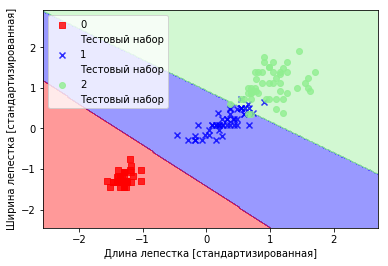

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, classifier=svm, 
                     test_idx=range(105, 150))
plt.xlabel("Длина лепестка [стандартизированная]")
plt.ylabel("Ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.show()

## Кернелизация

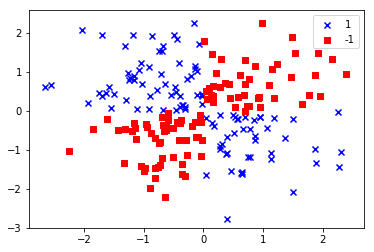

In [17]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3)
plt.legend()
plt.show()

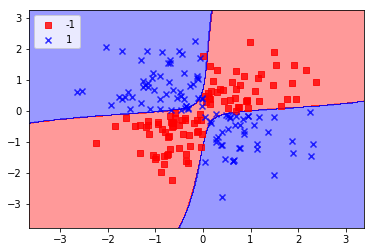

In [26]:
svm2 = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm2.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm2)
plt.legend(loc='upper left')
plt.show()

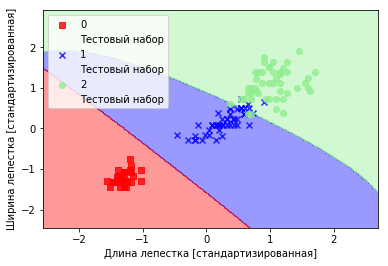

In [28]:
svm3 = SVC(kernel='rbf', C=1.0, random_state=0, gamma=0.2)
svm3.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, classifier=svm3, 
                     test_idx=range(105, 150))
plt.xlabel("Длина лепестка [стандартизированная]")
plt.ylabel("Ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.show()

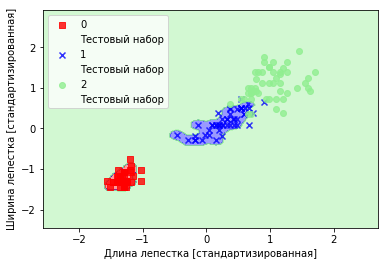

In [30]:
svm4 = SVC(kernel='rbf', C=1.0, random_state=0, gamma=100.2)
svm4.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined_std, classifier=svm4, 
                     test_idx=range(105, 150))
plt.xlabel("Длина лепестка [стандартизированная]")
plt.ylabel("Ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.show()